       y    x1   x2     x3     x4       x5       x6    x7
0  36.98   5.1  400  51.37   4.24  1483.83  2227.25  2.06
1  13.74  26.4  400  72.33  30.87   289.94   434.90  1.33
2  10.08  23.8  400  71.44  33.01   320.79   481.19  0.97
3   8.53  46.4  400  79.15  44.61   164.76   247.14  0.62
4  36.42   7.0  450  80.47  33.84  1097.26  1645.89  0.22

-----------
Normal probability plot of the residuals for model 1 (x6 and x7)



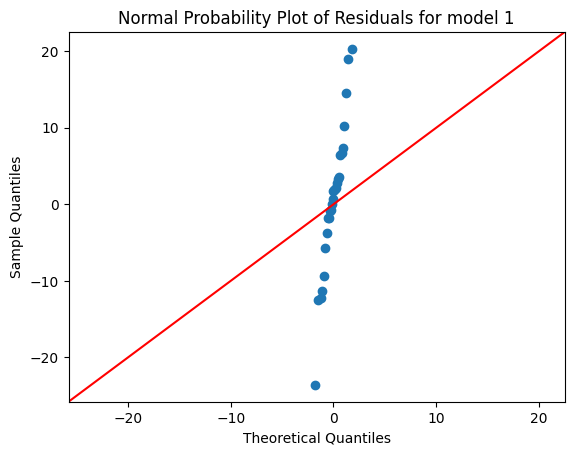


-----------
Normal probability plot of the residuals for model 2 (x6)



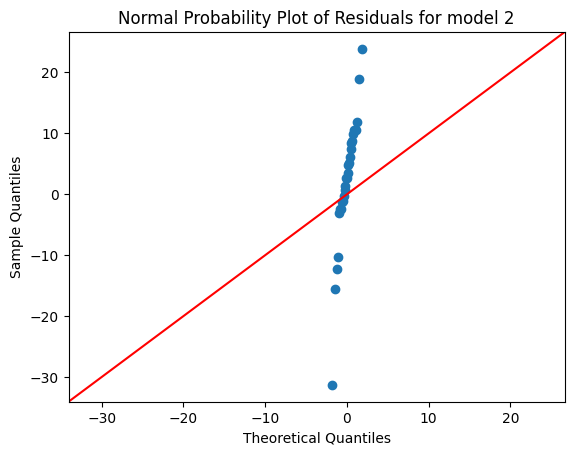


-----------

Plot of the residuals versus the predicted response for model 1 (x6 and x7).



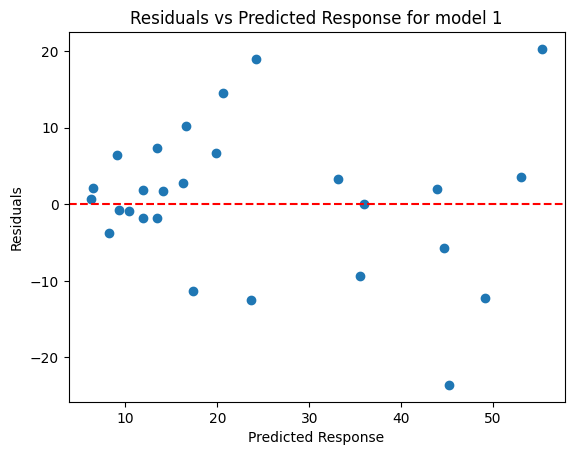


-----------

Plot of the residuals versus the predicted response for model 2 (x6).



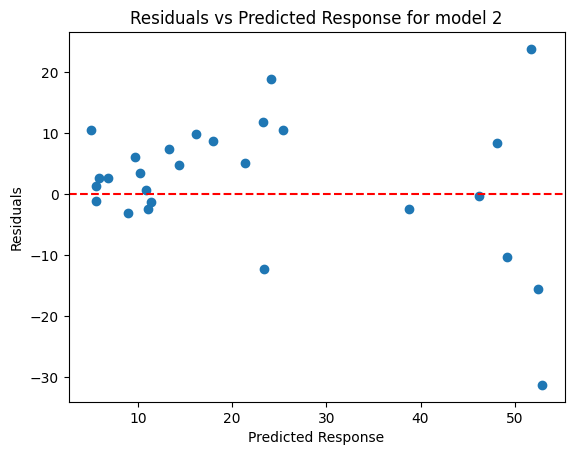


-----------

Residuals versus time order model 1.



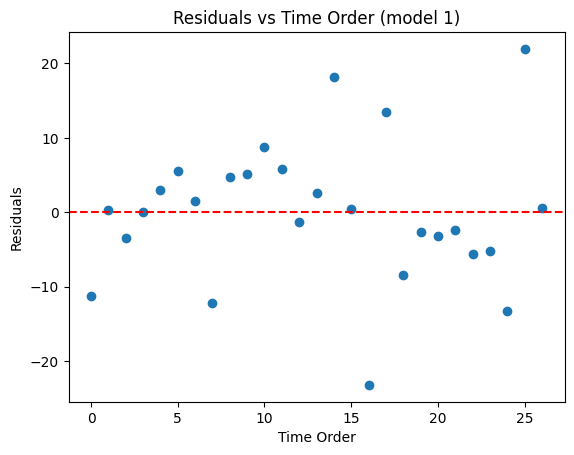


-----------

Residuals versus time order model 2.



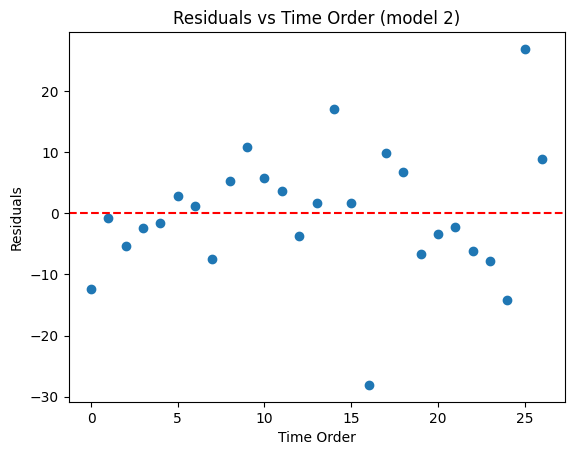

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_partregress_grid

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
url = 'https://raw.githubusercontent.com/ramirezramiro/linear-reg/main/Model%20Adequacy%20Checking%20(ch.4)/data(ch.4)/table-b5.csv'
df = pd.read_csv(url)

specific_columns = df[["y","x1","x2","x3","x4","x5","x6","x7"]]
print(specific_columns.head())

# Extract the features (X) and target variable (y) for model 1(x6 and x7)
X_model_1 = specific_columns[["x6","x7"]].values
y_model_1 = specific_columns["y"].values

model_1 = sm.OLS(y_model_1, X_model_1)
results_1 = model_1.fit()
residuals_1 = results_1.resid
y_pred_1 = results_1.predict(X_model_1)

# Extract the features (X) and target variable (y) for model 2(x6)
X_model_2 = specific_columns[["x6"]].values
y_model_2 = specific_columns["y"].values

model_2 = sm.OLS(y_model_2, X_model_2)
results_2 = model_2.fit()
residuals_2 = results_2.resid
y_pred_2 = results_2.predict(X_model_2)

print("\n-----------")
print("Normal probability plot of the residuals for model 1 (x6 and x7)\n")
# Print the mathematical function of the model

sm.qqplot(residuals_1, line='45')

# Customize the plot
plt.title('Normal Probability Plot of Residuals for model 1')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
# Display the plot
plt.show()
print("\n-----------")
print("Normal probability plot of the residuals for model 2 (x6)\n")
# Print the mathematical function of the model

sm.qqplot(residuals_2, line='45')

# Customize the plot
plt.title('Normal Probability Plot of Residuals for model 2')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
# Display the plot
plt.show()
print("\n-----------\n")

print("Plot of the residuals versus the predicted response for model 1 (x6 and x7).\n")

# Plot the residuals versus the predicted response
plt.scatter(y_pred_1, residuals_1)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Customize the plot
plt.title('Residuals vs Predicted Response for model 1')
plt.xlabel('Predicted Response')
plt.ylabel('Residuals')

# Display the plot
plt.show()
print("\n-----------\n")

print("Plot of the residuals versus the predicted response for model 2 (x6).\n")

# Plot the residuals versus the predicted response
plt.scatter(y_pred_2, residuals_2)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Customize the plot
plt.title('Residuals vs Predicted Response for model 2')
plt.xlabel('Predicted Response')
plt.ylabel('Residuals')

# Display the plot
plt.show()
print("\n-----------\n")
print("Residuals versus time order model 1.\n")

model_res_1 = sm.OLS(y, sm.add_constant(X_model_1))
results_res_1 = model_res_1.fit()
residuals_res_1 = results_res_1.resid
y_pred_res_1 = results_res_1.predict(sm.add_constant(X_model_1))

# Plot the residuals versus time order
plt.scatter(range(len(residuals_res_1)), residuals_res_1)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Customize the plot
plt.title('Residuals vs Time Order (model 1)')
plt.xlabel('Time Order')
plt.ylabel('Residuals')

# Display the plot
plt.show()

print("\n-----------\n")
print("Residuals versus time order model 2.\n")

model_res_2 = sm.OLS(y, sm.add_constant(X_model_2))
results_res_2 = model_res_2.fit()
residuals_res_2 = results_res_2.resid
y_pred_res_2 = results_res_2.predict(sm.add_constant(X_model_2))

# Plot the residuals versus time order
plt.scatter(range(len(residuals_res_2)), residuals_res_2)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Customize the plot
plt.title('Residuals vs Time Order (model 2)')
plt.xlabel('Time Order')
plt.ylabel('Residuals')

# Display the plot
plt.show()